In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [76]:
(X_train,Y_train),(X_test,Y_test)=tf.keras.datasets.mnist.load_data()

In [77]:
X_train=X_train/255
X_test=X_test/255
imageOut=np.reshape(np.array(list(X_train)+list(X_test)),(70000,784))

In [24]:
def Ymanage(Y_train):
  Yupdated=[]
  for i in Y_train:
    y=np.zeros(10)
    y[i]=1
    Yupdated.append(y)
  return np.array(Yupdated)

In [79]:
labelOut=list(Y_train)+list(Y_test)
YTrainUpdate=Ymanage(labelOut)

In [81]:
class Generative_model(tf.keras.Model):
  def __init__(self,rate):
    super(Generative_model,self).__init__()
    self.dense1=tf.keras.layers.Dense(128,activation='relu')
    self.dense2=tf.keras.layers.Dense(256,activation='relu')
    self.dense3=tf.keras.layers.Dense(256,activation='relu')
    self.dense4=tf.keras.layers.Dense(512,activation='relu')
    self.dense5=tf.keras.layers.Dense(784,activation='sigmoid')
    self.dropout=tf.keras.layers.Dropout(rate=rate)
    self.norm=tf.keras.layers.LayerNormalization(epsilon=1e-5)
    self.norm2=tf.keras.layers.LayerNormalization(epsilon=1e-5)
  def call(self,input,training):
    x=self.dense1(input)
    x1=self.dense2(x)
    x=self.dense3(x1)
    x=self.norm(x1+x)
    x=self.dense4(x)
    x=self.dropout(x,training=training)
    return self.dense5(x)

In [82]:
model=Generative_model(0.1)

In [83]:
model.compile(
    optimizer='adam',
    loss='mae',
    metrics=['accuracy']
)

In [ ]:
model.fit(YTrainUpdate,imageOut,epochs=10,batch_size=22)

In [91]:
def outputs(i):
  arr=YTrainUpdate[i]
  image=model(arr[np.newaxis,:],training=False)
  plt.imshow(np.reshape(image,(28,28)),cmap='gray')
  plt.xlabel(f'Original: {np.argmax(arr)}')
  plt.show()

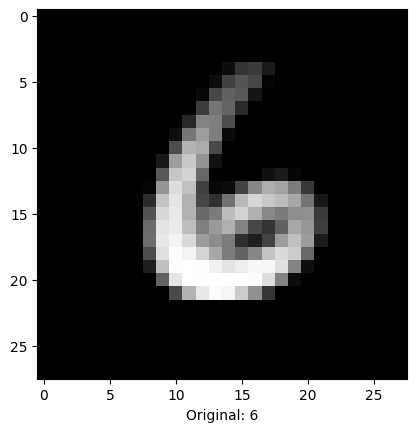

In [98]:
outputs(4268)